# Modeling
- **Import necessary libraries.**

In [2]:
# standard libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style('ticks')

# modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# saving libraries
import gzip
import pickle

# custom functions
from functions import *

# reload when functions is edited
%load_ext autoreload
%autoreload 2

from tqdm import tqdm

## Load dataframes

In [3]:
# uncomment to load
with gzip.open('data/5k_jan_thru_may_tweets_plus_features.pkl', 'rb') as hello:
    df = pickle.load(hello)

In [5]:
df.head()

,date,tweet,username,link,nlikes,nreplies,nretweets,sentiment_score,sentiment,clean_tweet,...,lda_1,lda_2,lda_3,lda_4,lda_5,lda_6,lda_7,lda_8,lda_9,subjectivity_score
0,2020-01-01,"https://mltshp.com/p/1HLSB ""This is the deat...",Best_of_MLTSHP,https://twitter.com/Best_of_MLTSHP/status/1212...,1.0,0.0,1.0,-0.8176,negative,death thomas unknown peasant died river,...,0.034003,0.034004,0.034012,0.034003,0.034006,0.034003,0.240296,0.034003,0.487661,0.600000
1,2020-01-01,Ready to heard this? Homemade hair treatment a...,lumora_lu,https://twitter.com/lumora_lu/status/121251804...,0.0,0.0,0.0,-0.8905,negative,ready heard homemade hair treatment ann cherry...,...,0.021874,0.021892,0.021897,0.021906,0.084468,0.021876,0.099109,0.021873,0.021874,0.560000
2,2020-01-01,We all know what a joke #CCPChina is when it c...,odiecher,https://twitter.com/odiecher/status/1212517557...,1.0,1.0,1.0,0.6705,positive,joke #ccpchina come epidemic outbreakthink sta...,...,0.020862,0.020866,0.020862,0.020862,0.081748,0.020860,0.086471,0.020860,0.020863,0.462963
3,2020-01-01,Thought death masks gave you the horn freak,Hevysmoker,https://twitter.com/Hevysmoker/status/12125155...,0.0,0.0,0.0,-0.7783,negative,thought death gave horn freak,...,0.033897,0.033904,0.033899,0.033897,0.033902,0.033897,0.033901,0.253149,0.033919,0.000000
4,2020-01-01,"Interesting cult of death mask he’s wearing, 🤔...",FaithR8s,https://twitter.com/FaithR8s/status/1212510409...,1.0,0.0,1.0,-0.2960,negative,interesting cult death thinkingface electronic...,...,0.259405,0.029399,0.029394,0.411632,0.029402,0.029414,0.029392,0.029392,0.123171,0.500000


In [6]:
df.isna().sum()

date                  0
tweet                 0
username              0
link                  0
nlikes                0
nreplies              0
nretweets             0
sentiment_score       0
sentiment             0
clean_tweet           0
lda_topic_max         0
lda_0                 0
lda_1                 0
lda_2                 0
lda_3                 0
lda_4                 0
lda_5                 0
lda_6                 0
lda_7                 0
lda_8                 0
lda_9                 0
subjectivity_score    0
dtype: int64

In [3]:
df.columns

Index(['date', 'tweet', 'username', 'link', 'nlikes', 'nreplies', 'nretweets',
       'sentiment_score', 'sentiment', 'clean_tweet', 'lda_topic_max', 'lda_0',
       'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5', 'lda_6', 'lda_7', 'lda_8',
       'lda_9', 'subjectivity_score'],
      dtype='object')

In [4]:
with gzip.open('data/data_vec.pkl', 'rb') as hello:
    vectors_df = pickle.load(hello)
    
vectors_df.shape

(575949, 3712)

### Combine necessary features columns

In [5]:
feature_cols = ['nlikes', 'nreplies', 'nretweets', 'lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5',
                'lda_6', 'lda_7', 'lda_8', 'lda_9', 'subjectivity_score']

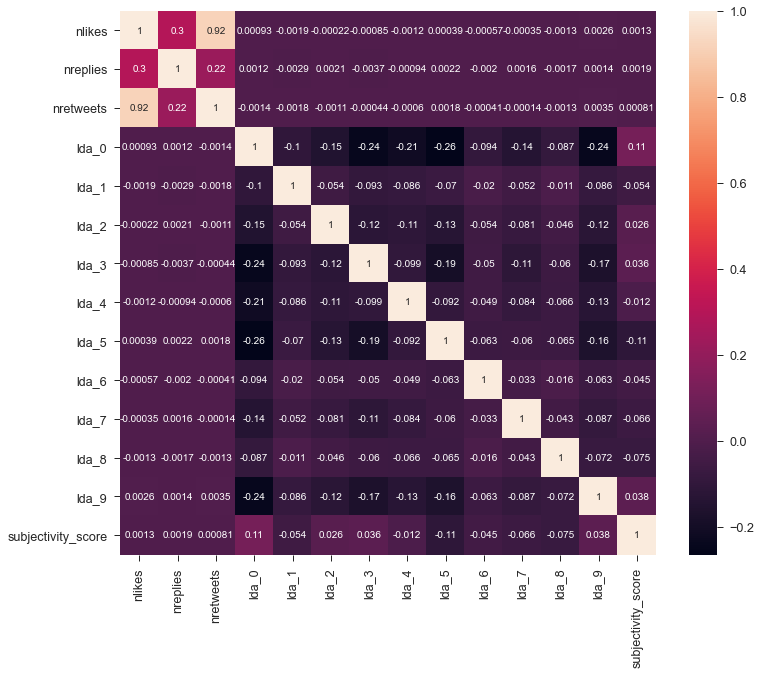

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df[feature_cols].corr(), annot=True)

In [7]:
# drop nretweets
feature_cols = ['nlikes', 'nreplies', 'lda_0', 'lda_1', 'lda_2', 'lda_3', 'lda_4', 'lda_5',
                'lda_6', 'lda_7', 'lda_8', 'lda_9', 'subjectivity_score']

In [8]:
X = pd.concat([df[feature_cols], vectors_df], axis=1)
y = df['sentiment']

X.shape, y.shape

((575949, 3725), (575949,))

# Train Test Split

In [9]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

X_train.shape, X_test.shape

((403164, 3725), (172785, 3725))

# MinMax Scaler

In [10]:
# MinMax Scaler
mm_scaler = MinMaxScaler()
X_train_mm = mm_scaler.fit_transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

# Bernoulli Naive Bayes

In [11]:
%%time

# create Bernoulli Naive Bayes object
bnb = BernoulliNB()

# train model
benaba = bnb.fit(X_train_mm, y_train)

# predict on corresponding test data
y_pred_bnb = benaba.predict(X_test_mm)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_bnb))
# checking f1
print('Test F1 score: ', f1_score(y_test, y_pred_bnb, average='weighted'))
# checking recall
print('Test Recall score: ', recall_score(y_test, y_pred_bnb, average='weighted'))
# checking precision
print('Test Precision score: ', precision_score(y_test, y_pred_bnb, average='weighted'))

Test Accuracy score:  0.7032439158491767
Test F1 score:  0.7058146286649454
Test Recall score:  0.7032439158491767
Test Precision score:  0.7157080531925692
CPU times: user 1min 35s, sys: 30.3 s, total: 2min 5s
Wall time: 2min 8s


In [12]:
# top 10 most important features per class
pos_class_prob_sorted = benaba.feature_log_prob_[0, :].argsort()
neu_class_prob_sorted = benaba.feature_log_prob_[1, :].argsort()
neg_class_prob_sorted = benaba.feature_log_prob_[2, :].argsort()

print(np.take(X.columns, pos_class_prob_sorted[:10]))
print(np.take(X.columns, neu_class_prob_sorted[:10]))
print(np.take(X.columns, neg_class_prob_sorted[:10]))

Index(['#wholesale', '#sale', 'okhand', 'faceblowingakiss', 'smilingfacewith3',
       '#healthy', 'purpleheart', '#safe', 'twohearts', 'blueheart'],
      dtype='object')
Index(['incompetent', 'smilingfacewithheart', '#love', 'celebrate', 'improve',
       'incompetence', 'smilingfacewith3', 'okhand', '#healthy',
       '#nomeatnocoronavirus'],
      dtype='object')
Index(['iniran', 'assault', 'thief', 'suicide', 'incompetence', 'germany's',
       '#fight', 'fails', 'threatens', 'violence'],
      dtype='object')


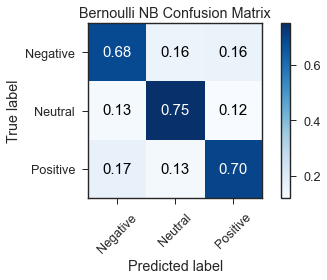

In [13]:
cm_benaba = confusion_matrix(y_test, y_pred_bnb)
classes = ['Negative', 'Neutral', 'Positive']
plot_confusion_matrix(cm_benaba, classes, normalize=True,
                      title='Bernoulli NB Confusion Matrix', cmap=plt.cm.Blues)

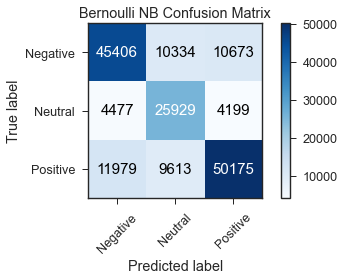

In [14]:
cm_benaba = confusion_matrix(y_test, y_pred_bnb)
classes = ['Negative', 'Neutral', 'Positive']
plot_confusion_matrix(cm_benaba, classes, normalize=False,
                      title='Bernoulli NB Confusion Matrix', cmap=plt.cm.Blues)

# Multinomial Naive Bayes

In [15]:
%%time

# create Multinomial Naive Bayes object
mnb = MultinomialNB()

# train models using only MinMax scaler (Multinomial NB cannot work with negative values)
munaba = mnb.fit(X_train_mm, y_train)

# predict on corresponding test data
y_pred_mnb = munaba.predict(X_test_mm)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_mnb))
# checking f1
print('Test F1 score: ', f1_score(y_test, y_pred_mnb, average='weighted'))
# checking recall
print('Test Recall score: ', recall_score(y_test, y_pred_mnb, average='weighted'))
# checking precision
print('Test Precision score: ', precision_score(y_test, y_pred_mnb, average='weighted'))

Test Accuracy score:  0.6901409265850623
Test F1 score:  0.6812406404843396
Test Recall score:  0.6901409265850623
Test Precision score:  0.6918647591793885
CPU times: user 17.4 s, sys: 8.1 s, total: 25.5 s
Wall time: 22.5 s


In [16]:
# top 10 most important features per class
pos_class_prob_sorted = munaba.feature_log_prob_[0, :].argsort()
neu_class_prob_sorted = munaba.feature_log_prob_[1, :].argsort()
neg_class_prob_sorted = munaba.feature_log_prob_[2, :].argsort()

print(np.take(X.columns, pos_class_prob_sorted[:10]))
print(np.take(X.columns, neu_class_prob_sorted[:10]))
print(np.take(X.columns, neg_class_prob_sorted[:10]))

Index(['#wholesale', '#sale', 'okhand', 'smilingfacewith3', 'blueheart',
       'twohearts', 'faceblowingakiss', '#love', 'purpleheart', '#healthy'],
      dtype='object')
Index(['incompetent', '#love', 'celebrate', 'okhand', 'smilingfacewithheart',
       'improve', 'smilingfacewith3', 'incompetence', 'illegal', 'heartsuit'],
      dtype='object')
Index(['iniran', 'assault', 'thief', 'incompetence', 'suicide', 'nlikes',
       'fatality', 'fails', 'threatens', 'swine'],
      dtype='object')


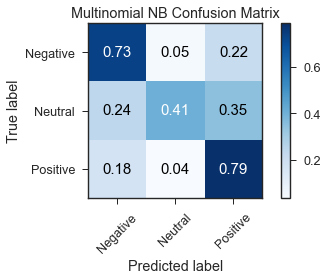

In [17]:
cm_munaba = confusion_matrix(y_test, y_pred_mnb)
classes = ['Negative', 'Neutral', 'Positive']
plot_confusion_matrix(cm_munaba, classes, normalize=True,
                      title='Multinomial NB Confusion Matrix', cmap=plt.cm.Blues)

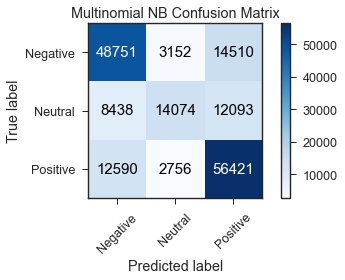

In [18]:
cm_munaba = confusion_matrix(y_test, y_pred_mnb)
classes = ['Negative', 'Neutral', 'Positive']
plot_confusion_matrix(cm_munaba, classes, normalize=False,
                      title='Multinomial NB Confusion Matrix', cmap=plt.cm.Blues)

# Decision Tree - Basic

In [19]:
%%time

# basic decision tree with class weights balanced
tree = DecisionTreeClassifier(class_weight='balanced', random_state=99)

# fit training data
tree.fit(X_train_mm, y_train)

# predict on test data
y_pred_tree = tree.predict(X_test_mm)

# check accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_tree))
# check f1
print('Test F1 score: ', f1_score(y_test, y_pred_tree, average='weighted'))
# check recall
print('Test Recall score: ', recall_score(y_test, y_pred_tree, average='weighted'))
# check precision
print('Test Precision score: ', precision_score(y_test, y_pred_tree, average='weighted'))

Test Accuracy score:  0.6669849813351854
Test F1 score:  0.6671321432561258
Test Recall score:  0.6669849813351854
Test Precision score:  0.6675903025019125
CPU times: user 29min 25s, sys: 18 s, total: 29min 43s
Wall time: 29min 56s


In [20]:
features_dict = dict(zip(X.columns, tree.feature_importances_))
sorted_d = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_d

[('subjectivity_score', 0.07821796102136695),
 ('lda_1', 0.034798984324226734),
 ('lda_8', 0.023821712992630542),
 ('lda_4', 0.022885981977410663),
 ('lda_3', 0.02050476544551357),
 ('lda_5', 0.020382854135824316),
 ('lda_7', 0.020029389469053284),
 ('lda_0', 0.02000036027552485),
 ('lda_9', 0.01974252305334894),
 ('lda_2', 0.018463124493834998)]

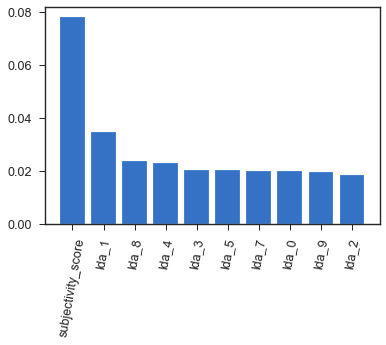

In [21]:
# top 10 most important features
tree_importance = [x[1] for x in sorted_d]

plt.bar([x[0] for x in sorted_d], tree_importance)
plt.xticks(rotation=80)
plt.show()

### Confusion Matrix

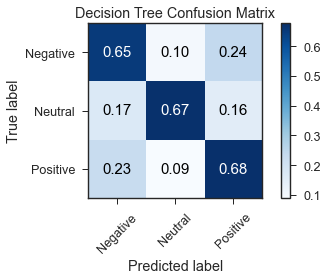

In [22]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
classes = ['Negative', 'Neutral', 'Positive']
plot_confusion_matrix(cm_tree, classes, normalize=True,
                      title='Decision Tree Confusion Matrix', cmap=plt.cm.Blues)

# plt.savefig('Images/dt_conf_matrix.png', dpi = 100)

In [7]:
import spacy

In [8]:
%%time 

nlp = spacy.load('en_core_web_md')

CPU times: user 15.6 s, sys: 639 ms, total: 16.2 s
Wall time: 16.4 s


In [9]:
%%time

df['spacy'] = df.clean_tweet.apply(lambda x: nlp(x))

CPU times: user 1h 4min 26s, sys: 1min 24s, total: 1h 5min 51s
Wall time: 1h 9min 42s


In [11]:
df.loc[1, 'spacy']

ready heard homemade hair treatment ann cherry dead sea mud fucking putas swear woman bitch shut fuck

In [12]:
doc = df.spacy[0]
doc

death thomas unknown peasant died river

In [13]:
doc[3].vector

array([-3.3874e-01, -2.8152e-02, -2.8041e-03,  2.5935e-01, -3.6988e-01,
        6.1843e-01,  6.0306e-01,  1.3322e-01, -4.1253e-01,  1.2300e+00,
       -6.5325e-01, -2.1622e-01, -4.1872e-01, -2.8045e-01,  2.7858e-01,
        4.9258e-01, -5.4890e-02, -4.6978e-01, -6.4711e-02, -4.0030e-01,
       -2.0977e-01, -4.0327e-01,  1.0050e-01,  5.1662e-02, -4.5481e-01,
       -3.6548e-01,  5.8559e-01,  5.8384e-01, -2.8027e-01,  5.2560e-01,
        1.6484e-01,  8.4835e-02,  2.5857e-01, -7.5646e-01, -4.1198e-01,
       -1.9358e-02, -3.1207e-01, -9.6737e-02,  2.3160e-01,  4.2964e-01,
        3.4601e-01,  7.1617e-01,  3.5789e-01, -4.4505e-01,  3.5926e-01,
       -4.9606e-01,  3.0671e-01,  6.1541e-01,  9.8895e-02, -2.5371e-02,
       -1.6731e-01,  3.0546e-01, -4.1053e-01, -4.1847e-01,  9.1041e-01,
        5.4921e-02,  8.3755e-01,  7.2408e-02, -5.0815e-01,  1.2188e-01,
       -2.4367e-01, -2.5145e-01,  2.9790e-01,  1.5411e-01, -1.1905e-01,
        4.4989e-02, -3.5307e-01,  4.0028e-01,  3.0250e-01, -1.05

In [14]:
df_vecs = pd.DataFrame(np.vstack(x.vector for x in df.spacy))
df_vecs.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.133389,0.243276,0.094263,-0.125549,-0.004964,0.094002,-0.025704,-0.076539,-0.094551,2.199177,...,-0.161251,-0.112153,-0.011130,0.089883,0.029886,-0.066583,-0.103878,0.090581,0.025777,-0.189903
1,-0.222725,-0.138446,-0.146935,-0.045627,-0.064720,-0.111766,0.031839,-0.174848,-0.075452,1.580744,...,0.132243,-0.143366,-0.093041,-0.281651,0.050318,-0.034539,-0.043478,-0.004397,-0.111534,-0.049617
2,-0.085513,0.124389,-0.091246,-0.096720,0.067044,-0.058840,0.160652,-0.146561,0.003398,1.347749,...,0.000730,0.106615,-0.087084,0.103946,0.166381,-0.041625,-0.035728,0.031003,-0.229264,0.053398
3,-0.188481,0.279946,-0.077391,0.019321,-0.017035,-0.054248,0.174995,-0.116922,-0.095443,2.249534,...,-0.176311,-0.046327,0.120274,-0.004991,0.138736,0.148036,-0.051977,0.281909,0.173710,-0.056148
4,-0.205791,-0.015908,0.266651,0.052813,0.033091,-0.016008,-0.004297,-0.157420,-0.085437,1.432157,...,-0.098622,0.034578,0.025441,0.087190,0.059629,-0.072163,0.166160,0.071011,-0.015187,0.057108


In [15]:
X = df_vecs.copy()
y = df.sentiment

# Train Test Split

In [16]:
# split into train and test data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

X_train2.shape, X_test2.shape

((403164, 300), (172785, 300))

# MinMax Scaler

In [10]:
# # MinMax Scaler
# mm_scaler2 = MinMaxScaler()
# X_train_mm2 = mm_scaler.fit_transform(X_train2)
# X_test_mm2 = mm_scaler.transform(X_test2)

# Bernoulli Naive Bayes

In [18]:
%%time

# create Bernoulli Naive Bayes object
bnb_spacy = BernoulliNB()

# train model
benaba_spacy = bnb_spacy.fit(X_train2, y_train2)

# predict on corresponding test data
y_pred_bnb_spacy = benaba_spacy.predict(X_test2)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test2, y_pred_bnb_spacy))
# checking f1
print('Test F1 score: ', f1_score(y_test2, y_pred_bnb_spacy, average='weighted'))
# checking recall
print('Test Recall score: ', recall_score(y_test2, y_pred_bnb_spacy, average='weighted'))
# checking precision
print('Test Precision score: ', precision_score(y_test2, y_pred_bnb_spacy, average='weighted'))

Test Accuracy score:  0.5388430708684203
Test F1 score:  0.5459183052470806
Test Recall score:  0.5388430708684203
Test Precision score:  0.5685763157299046
CPU times: user 10.6 s, sys: 1.67 s, total: 12.3 s
Wall time: 11.4 s


# Decision Tree - Tuned

In [19]:
%%time

# basic decision tree with class weights balanced
tree_spacy = DecisionTreeClassifier(class_weight='balanced', random_state=99)

# fit training data
tree_spacy.fit(X_train2, y_train2)

# predict on test data
y_pred_tree_spacy = tree_spacy.predict(X_test2)

# check accuracy
print('Test Accuracy score: ', accuracy_score(y_test2, y_pred_tree_spacy))
# check f1
print('Test F1 score: ', f1_score(y_test2, y_pred_tree_spacy, average='weighted'))
# check recall
print('Test Recall score: ', recall_score(y_test2, y_pred_tree_spacy, average='weighted'))
# check precision
print('Test Precision score: ', precision_score(y_test2, y_pred_tree_spacy, average='weighted'))

Test Accuracy score:  0.5539774864716266
Test F1 score:  0.553932814313802
Test Recall score:  0.5539774864716266
Test Precision score:  0.5538901944687145
CPU times: user 6min 52s, sys: 655 ms, total: 6min 53s
Wall time: 6min 53s


In [23]:
features_dict = dict(zip(X.columns, tree.feature_importances_))
sorted_d = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_d

[('subjectivity_score', 0.07857144652970349),
 ('lda_1', 0.03390110688039528),
 ('lda_3', 0.02490601946403747),
 ('lda_8', 0.022330999881295836),
 ('lda_4', 0.02021780638322072),
 ('lda_0', 0.02004712169683673),
 ('lda_5', 0.019817086383586154),
 ('lda_7', 0.01963648131719604),
 ('lda_2', 0.01891502906767819),
 ('lda_9', 0.018633338587105877)]

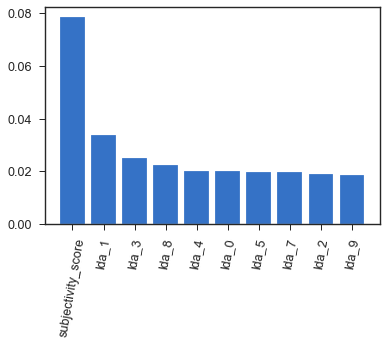

In [44]:
# top 10 most important features
tree_importance = [x[1] for x in sorted_d]

plt.bar([x[0] for x in sorted_d], tree_importance)
plt.xticks(rotation=80)
plt.show()

### Confusion Matrix

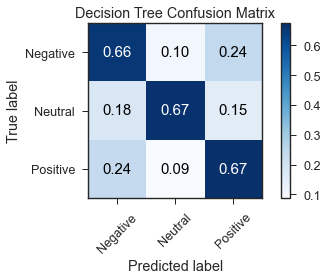

In [25]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
classes = ['Negative', 'Neutral', 'Positive']
plot_confusion_matrix(cm_tree, classes, normalize=True,
                      title='Decision Tree Confusion Matrix', cmap=plt.cm.Blues)

# plt.savefig('Images/dt_conf_matrix.png', dpi = 100)

In [30]:
please break this code

from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

In [35]:
# Create DOT data
dot_data = export_graphviz(tree, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Negative', 'Neutral', 'Positive'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

KeyboardInterrupt: 

In [33]:
# dot_data = StringIO()
dot_data = export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns,
                class_names=['negative','neutral', 'positive'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('charts/decision_twee.png')
Image(graph.create_png())

AttributeError: 'NoneType' object has no attribute 'getvalue'